In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [21]:
np.random.seed(42)

n = 100  # nombre d'individus

X1 = np.random.normal(10, 2, n)                      # variable 1
X2 = 0.5 * X1 + np.random.normal(0, 1, n)            # variable 2 corrélée à X1
X3 = np.random.normal(50, 10, n)                     # variable 3
X4 = 0.3 * X3 + np.random.normal(0, 5, n)            # variable 4 corrélée à X3
X5 = np.random.normal(0, 1, n)                       # variable 5 peu corrélée
#X6 = X1 + np . random . normal (0 , 0.5 , n )

data = pd.DataFrame({
    "X1": X1,
    "X2": X2,
    "X3": X3,
    "X4": X4,
    "X5": X5,
    #"X6": X6
})

data.head() #lire les 5 premiere lignes du tableau

,X1,X2,X3,X4,X5
0,10.993428,4.081343,53.577874,11.928387,-1.594428
1,9.723471,4.441090,55.607845,13.881448,-0.599375
2,11.295377,5.304974,60.830512,21.985622,0.005244
3,13.046060,5.720753,60.538021,21.213257,0.046981
4,9.531693,4.604561,36.223306,10.762484,-0.450065


In [22]:
scaler = StandardScaler() #centre reduit les donnees
X_norm = scaler.fit_transform(data) #normalisation des donnees (fit : calcule les moyennes et écarts-types de chaque variable. + transform : normalisation)

print("Moyennes après normalisation :", X_norm.mean(axis=0)) #axis=0 pour les colonnes
print("Variances après normalisation :", X_norm.var(axis=0, ddof=1)) #ddof=1 pour échantillon


Moyennes après normalisation : [-1.69309011e-16  1.97619698e-16  5.30686606e-16 -7.32747196e-17
 -8.88178420e-18]
Variances après normalisation : [1.01010101 1.01010101 1.01010101 1.01010101 1.01010101]


In [23]:
pca = PCA() #initialisation de l'objet PCA de sklearn sans limiter le nombre de composantes 
X_pca = pca.fit_transform(X_norm) #application de l'ACP sur les données normalisées

eigenvalues = pca.explained_variance_ #valeurs propres λ1, λ2, ...
explained_var_ratio = pca.explained_variance_ratio_ #pourcentages d'inertie expliquée : λ / somme(λ)=5
cum_explained = np.cumsum(explained_var_ratio) #inertie cumulée : somme des pourcentages d'inertie expliquée jusqu'à la k-ième composante

print("Valeurs propres :", eigenvalues)
print("Pourcentages d'inertie expliquée :", explained_var_ratio)
print("Inertie cumulée :", cum_explained)

Valeurs propres : [1.77419543 1.5285879  1.05583206 0.35191844 0.33997121]
Pourcentages d'inertie expliquée : [0.3512907  0.3026604  0.20905475 0.06967985 0.0673143 ]
Inertie cumulée : [0.3512907  0.6539511  0.86300585 0.9326857  1.        ]


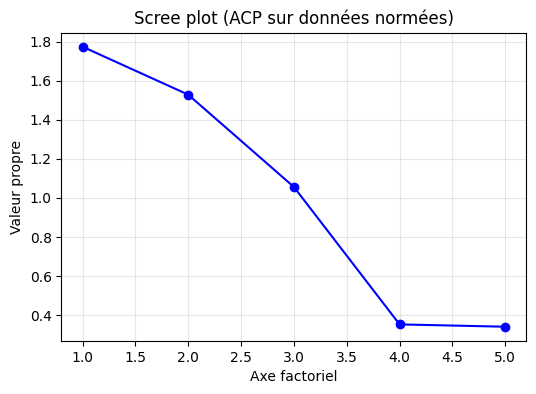

In [24]:
plt.figure(figsize=(6,4)) #taille de la figure
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, 'o-', color='blue') #trace des valeurs propres
plt.xlabel("Axe factoriel")
plt.ylabel("Valeur propre")
plt.title("Scree plot (ACP sur données normées)")
plt.grid(alpha=0.3)
plt.show()

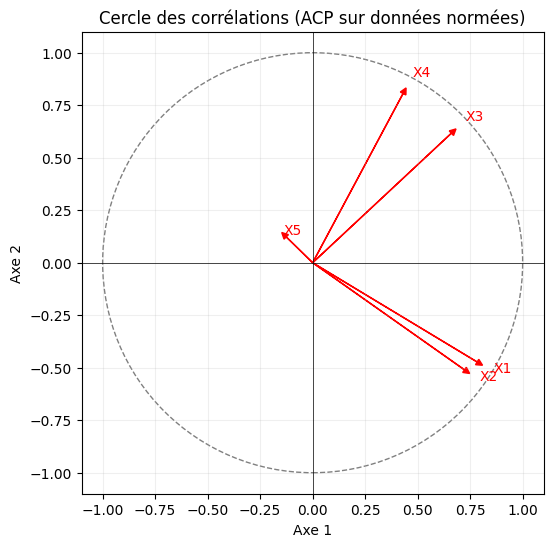

In [25]:
loadings = pca.components_.T  # (p : variable, k : axe) matrice des loadings (vecteurs propres)
sqrt_eig = np.sqrt(eigenvalues) # racines des valeurs propres 
corr = loadings * sqrt_eig  # Calcul des corrélations entre variables et axes

fig, ax = plt.subplots(figsize=(6,6)) # taille de la figure

# Tracé des flèches pour chaque variable
for i, var in enumerate(data.columns):
    x = corr[i, 0] # coordonnée sur le 1er axe
    y = corr[i, 1] # coordonnée sur le 2ème axe
    ax.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, fc='red', ec='red') # flèche de l'origine à (x,y)
    ax.text(x*1.1, y*1.1, var, color='red') # étiquette de la variable légèrement décalée 

circle = plt.Circle((0,0), 1, color='gray', fill=False, linestyle='--') # cercle unité
ax.add_artist(circle) # ajout du cercle à la figure

ax.set_xlim(-1.1, 1.1) # limites des axes
ax.set_ylim(-1.1, 1.1) # limites des axes 
ax.set_xlabel("Axe 1")
ax.set_ylabel("Axe 2")
ax.set_title("Cercle des corrélations (ACP sur données normées)")
ax.axhline(0, color='black', linewidth=0.5) # axes x=0 et y=0 
ax.axvline(0, color='black', linewidth=0.5)
ax.set_aspect('equal', 'box') # aspect égal
plt.grid(alpha=0.2)
plt.show()

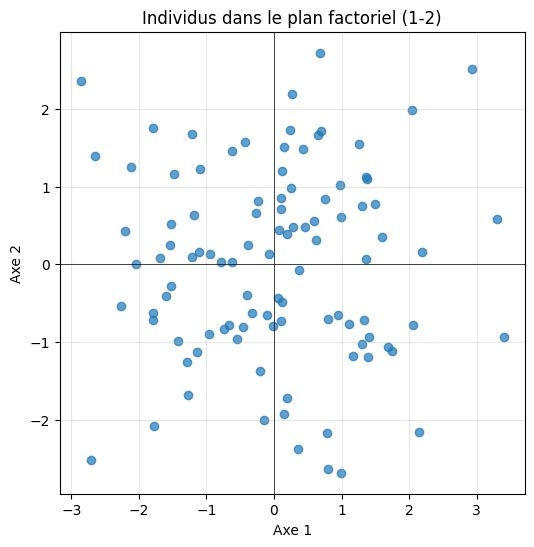

In [26]:
F1 = X_pca[:, 0] # coordonnées des individus sur le 1er composante principale
F2 = X_pca[:, 1] # coordonnées des individus sur le 2ème composante principale 1

plt.figure(figsize=(6,6)) # taille de la figure
plt.scatter(F1, F2, alpha=0.7) # nuage de points
plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.title("Individus dans le plan factoriel (1-2)")
plt.axhline(0, color='black', linewidth=0.5) # axes x=0 et y=0
plt.axvline(0, color='black', linewidth=0.5) # axes x=0 et y=0
plt.grid(alpha=0.3) # grille
plt.show()

In [27]:
n, p = X_norm.shape

# Contributions des individus à l'axe 1 (en %)
ctr_ind_1 = (F1**2) / (n * eigenvalues[0]) * 100
print("Contributions des 10 premiers individus à l'axe 1 :")
print(ctr_ind_1[:10])

# Qualité de représentation (cos²) sur le plan 1–2
dist2 = (X_norm**2).sum(axis=1)
cos2_1 = F1**2 / dist2
cos2_2 = F2**2 / dist2
cos2_12 = (F1**2 + F2**2) / dist2

print("cos² sur l'axe 1 (10 premiers) :", cos2_1[:10])
print("cos² sur l'axe 2 (10 premiers) :", cos2_2[:10])
print("cos² cumulés (1-2) (10 premiers) :", cos2_12[:10])

Contributions des 10 premiers individus à l'axe 1 :
[2.34341412e-03 2.61798996e-03 1.25897694e+00 2.69501990e+00
 7.41414550e-01 2.52468539e-01 6.51667636e+00 6.94894093e-01
 6.27181073e-03 4.86433157e+00]
cos² sur l'axe 1 (10 premiers) : [0.00115967 0.00623936 0.74467591 0.86400866 0.46299302 0.27451535
 0.78218983 0.62571647 0.01390648 0.52094671]
cos² sur l'axe 2 (10 premiers) : [0.05235222 0.02412883 0.1999885  0.00471103 0.45377927 0.37555653
 0.05985728 0.30253828 0.89780676 0.38254728]
cos² cumulés (1-2) (10 premiers) : [0.05351189 0.03036819 0.94466442 0.86871969 0.91677228 0.65007188
 0.84204712 0.92825475 0.91171324 0.90349399]
